# tutorials for NN

Following these tutorials (in order)
* LSTM Time Series Forecasting https://www.youtube.com/watch?v=c0k-YLQGKjY
* Multivariate Time Series Forecasting Using LSTM, GRU & 1d CNNs https://www.youtube.com/watch?v=kGdbPnMCdOg

**

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-11-13 15:00:32.283849: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 15:00:33.852326: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 15:00:33.852409: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 15:00:33.961076: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-13 15:00:34.649765: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 15:00:34.652249: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
df = pd.read_pickle('../data/pickled_data/AFL259_short.pkl')
df.reset_index(inplace=True,drop=True)
df.head(15)

,date,avg_well_depth,gage_ht,discharge_cfs,prcp,temp_avg,temp_max,temp_min,hPa_avg,hum_avg,hum_max,hum_min,wind_avg,wind_max,wind_min,gust_avg,gust_max,gust_min
0,2006-02-07,91.0100,21.65,9420.0,0.00,35.722500,46.31,28.26,1028.625000,76.375000,93.0,47.0,5.826667,10.29,3.36,0.0000,0.00,0.0
1,2006-02-08,91.0429,21.64,9380.0,0.00,35.124167,42.46,28.72,1026.625000,84.416667,100.0,69.0,6.366250,11.41,3.36,0.0000,0.00,0.0
2,2006-02-09,91.1096,21.58,9210.0,0.00,32.172500,43.05,24.44,1035.041667,64.541667,98.0,30.0,8.732917,13.87,5.82,0.7175,17.22,0.0
3,2006-02-10,91.1954,21.46,8830.0,0.00,31.252083,42.04,24.33,1038.958333,56.250000,81.0,27.0,9.655417,16.11,5.82,0.0000,0.00,0.0
4,2006-02-11,91.3012,21.36,8550.0,0.00,30.429583,42.46,21.51,1037.583333,61.708333,84.0,36.0,7.250417,10.29,3.36,0.0000,0.00,0.0
5,2006-02-12,91.4004,21.28,8330.0,0.00,31.932083,43.92,24.57,1035.333333,68.041667,87.0,44.0,6.179583,9.17,3.36,0.0000,0.00,0.0
6,2006-02-13,91.5129,21.10,7820.0,0.10,31.004848,35.42,26.37,1025.878788,91.121212,96.0,81.0,7.274242,19.46,0.00,0.0000,0.00,0.0
7,2006-02-14,91.6071,20.97,7460.0,0.00,25.755417,35.42,18.34,1021.125000,76.083333,98.0,51.0,7.147917,10.29,3.36,0.0000,0.00,0.0
8,2006-02-15,91.7167,20.91,7300.0,0.00,25.828750,35.62,17.37,1019.750000,66.083333,88.0,33.0,6.552083,10.29,3.36,0.0000,0.00,0.0
9,2006-02-16,91.7925,20.81,7040.0,0.06,22.394400,27.81,12.18,1023.360000,65.240000,85.0,31.0,13.198800,26.17,2.24,8.4468,33.11,0.0


In [3]:
df.index = df.date
df

,date,avg_well_depth,gage_ht,discharge_cfs,prcp,temp_avg,temp_max,temp_min,hPa_avg,hum_avg,hum_max,hum_min,wind_avg,wind_max,wind_min,gust_avg,gust_max,gust_min
date,,,,,,,,,,,,,,,,,,
2006-02-07,2006-02-07,91.0100,21.65,9420.0,0.0,35.722500,46.31,28.26,1028.625000,76.375000,93.0,47.0,5.826667,10.29,3.36,0.000000,0.00,0.0
2006-02-08,2006-02-08,91.0429,21.64,9380.0,0.0,35.124167,42.46,28.72,1026.625000,84.416667,100.0,69.0,6.366250,11.41,3.36,0.000000,0.00,0.0
2006-02-09,2006-02-09,91.1096,21.58,9210.0,0.0,32.172500,43.05,24.44,1035.041667,64.541667,98.0,30.0,8.732917,13.87,5.82,0.717500,17.22,0.0
2006-02-10,2006-02-10,91.1954,21.46,8830.0,0.0,31.252083,42.04,24.33,1038.958333,56.250000,81.0,27.0,9.655417,16.11,5.82,0.000000,0.00,0.0
2006-02-11,2006-02-11,91.3012,21.36,8550.0,0.0,30.429583,42.46,21.51,1037.583333,61.708333,84.0,36.0,7.250417,10.29,3.36,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-02,2018-06-02,79.4696,21.84,10000.0,0.0,62.812083,77.25,46.35,1022.750000,48.333333,83.0,24.0,6.976250,11.50,3.44,0.000000,0.00,0.0
2018-06-03,2018-06-03,80.0721,21.59,9240.0,0.0,69.826250,86.25,52.66,1013.875000,46.416667,79.0,23.0,10.141667,21.92,3.44,3.165833,29.97,0.0
2018-06-04,2018-06-04,80.4046,21.50,8970.0,0.0,62.956250,71.67,56.35,1012.833333,41.666667,65.0,18.0,14.850000,23.04,8.05,4.030417,28.77,0.0


In [4]:
df.index

DatetimeIndex(['2006-02-07', '2006-02-08', '2006-02-09', '2006-02-10',
               '2006-02-11', '2006-02-12', '2006-02-13', '2006-02-14',
               '2006-02-15', '2006-02-16',
               ...
               '2018-05-28', '2018-05-29', '2018-05-30', '2018-05-31',
               '2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
               '2018-06-05', '2018-06-06'],
              dtype='datetime64[ns]', name='date', length=4503, freq=None)

date
2006-02-07    91.0100
2006-02-08    91.0429
2006-02-09    91.1096
2006-02-10    91.1954
2006-02-11    91.3012
               ...   
2018-06-02    79.4696
2018-06-03    80.0721
2018-06-04    80.4046
2018-06-05    80.6565
2018-06-06    80.8423
Name: avg_well_depth, Length: 4503, dtype: float64

<Axes: xlabel='date'>

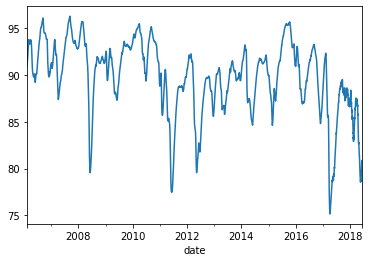

In [5]:
well = df.avg_well_depth
display(well)
well.plot()

In [6]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
WINDOW_SIZE = 5
X, y = df_to_X_y(well, WINDOW_SIZE)
X.shape, y.shape

((4498, 5, 1), (4498,))

### Train Test Split

In [8]:
X_train, y_train = X[:3498], y[:3498]
X_val, y_val = X[3498:3998], y[3498:3998]
X_test, y_test = X[3998:], y[3998:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((3498, 5, 1), (3498,), (500, 5, 1), (500,), (500, 5, 1), (500,))

In [9]:
X_train, y_train

(array([[[91.01  ],
         [91.0429],
         [91.1096],
         [91.1954],
         [91.3012]],
 
        [[91.0429],
         [91.1096],
         [91.1954],
         [91.3012],
         [91.4004]],
 
        [[91.1096],
         [91.1954],
         [91.3012],
         [91.4004],
         [91.5129]],
 
        ...,
 
        [[95.4479],
         [95.4433],
         [95.4413],
         [95.4196],
         [95.4054]],
 
        [[95.4433],
         [95.4413],
         [95.4196],
         [95.4054],
         [95.3908]],
 
        [[95.4413],
         [95.4196],
         [95.4054],
         [95.3908],
         [95.3604]]]),
 array([91.4004, 91.5129, 91.6071, ..., 95.3908, 95.3604, 95.3237]))

### Tensorflow things

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model

## Build LSTM single variable model

In [11]:
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

2023-11-13 15:00:50.919686: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-13 15:00:50.922530: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
cp = ModelCheckpoint('meremodel1/', save_best_only=True)
# the above makes a folder that our gitignore should exclude

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [13]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[cp])

Epoch 1/50
 91/110 [=======================>......] - ETA: 0s - loss: 7220.6152 - root_mean_squared_error: 84.9742INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 5s 26ms/step - loss: 6845.4956 - root_mean_squared_error: 82.7375 - val_loss: 4669.4419 - val_root_mean_squared_error: 68.3333
Epoch 2/50
 89/110 [=======================>......] - ETA: 0s - loss: 2949.7195 - root_mean_squared_error: 54.3113INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 2668.2075 - root_mean_squared_error: 51.6547 - val_loss: 1247.3467 - val_root_mean_squared_error: 35.3178
Epoch 3/50
 92/110 [========================>.....] - ETA: 0s - loss: 649.6098 - root_mean_squared_error: 25.4874INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 577.4955 - root_mean_squared_error: 24.0311 - val_loss: 163.2334 - val_root_mean_squared_error: 12.7763
Epoch 4/50
 90/110 [=======================>......] - ETA: 0s - loss: 70.3649 - root_mean_squared_error: 8.3884INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 61.8059 - root_mean_squared_error: 7.8617 - val_loss: 16.2533 - val_root_mean_squared_error: 4.0315
Epoch 5/50
 88/110 [=======================>......] - ETA: 0s - loss: 14.0446 - root_mean_squared_error: 3.7476INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 13.8749 - root_mean_squared_error: 3.7249 - val_loss: 8.2033 - val_root_mean_squared_error: 2.8641
Epoch 6/50
 88/110 [=======================>......] - ETA: 0s - loss: 12.5957 - root_mean_squared_error: 3.5490INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 12.1272 - root_mean_squared_error: 3.4824 - val_loss: 7.8748 - val_root_mean_squared_error: 2.8062
Epoch 7/50
 89/110 [=======================>......] - ETA: 0s - loss: 11.4561 - root_mean_squared_error: 3.3847INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 11.4518 - root_mean_squared_error: 3.3840 - val_loss: 7.6893 - val_root_mean_squared_error: 2.7730
Epoch 8/50
 91/110 [=======================>......] - ETA: 0s - loss: 9.4183 - root_mean_squared_error: 3.0689INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 9.2815 - root_mean_squared_error: 3.0466 - val_loss: 5.7487 - val_root_mean_squared_error: 2.3977
Epoch 9/50
 94/110 [========================>.....] - ETA: 0s - loss: 7.3807 - root_mean_squared_error: 2.7167INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 7.2384 - root_mean_squared_error: 2.6904 - val_loss: 4.7094 - val_root_mean_squared_error: 2.1701
Epoch 10/50
 90/110 [=======================>......] - ETA: 0s - loss: 5.3344 - root_mean_squared_error: 2.3096INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 5.2046 - root_mean_squared_error: 2.2814 - val_loss: 3.3621 - val_root_mean_squared_error: 1.8336
Epoch 11/50
104/110 [===========================>..] - ETA: 0s - loss: 3.0774 - root_mean_squared_error: 1.7543INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 21ms/step - loss: 3.0475 - root_mean_squared_error: 1.7457 - val_loss: 1.7474 - val_root_mean_squared_error: 1.3219
Epoch 12/50
 92/110 [========================>.....] - ETA: 0s - loss: 1.3492 - root_mean_squared_error: 1.1616INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 1.2434 - root_mean_squared_error: 1.1151 - val_loss: 0.6032 - val_root_mean_squared_error: 0.7766
Epoch 13/50
 92/110 [========================>.....] - ETA: 0s - loss: 0.4493 - root_mean_squared_error: 0.6703INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.4193 - root_mean_squared_error: 0.6475 - val_loss: 0.2346 - val_root_mean_squared_error: 0.4844
Epoch 14/50
 91/110 [=======================>......] - ETA: 0s - loss: 0.2385 - root_mean_squared_error: 0.4884INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.2343 - root_mean_squared_error: 0.4841 - val_loss: 0.1632 - val_root_mean_squared_error: 0.4040
Epoch 15/50
 90/110 [=======================>......] - ETA: 0s - loss: 0.1789 - root_mean_squared_error: 0.4230INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.1693 - root_mean_squared_error: 0.4114 - val_loss: 0.1535 - val_root_mean_squared_error: 0.3918
Epoch 16/50
 89/110 [=======================>......] - ETA: 0s - loss: 0.1500 - root_mean_squared_error: 0.3873INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.1437 - root_mean_squared_error: 0.3791 - val_loss: 0.0949 - val_root_mean_squared_error: 0.3080
Epoch 17/50
 94/110 [========================>.....] - ETA: 0s - loss: 0.1243 - root_mean_squared_error: 0.3526INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.1204 - root_mean_squared_error: 0.3470 - val_loss: 0.0790 - val_root_mean_squared_error: 0.2810
Epoch 18/50
110/110 [==============================] - 0s 3ms/step - loss: 0.1020 - root_mean_squared_error: 0.3194 - val_loss: 0.0895 - val_root_mean_squared_error: 0.2991
Epoch 19/50
 90/110 [=======================>......] - ETA: 0s - loss: 0.0952 - root_mean_squared_error: 0.3085INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0942 - root_mean_squared_error: 0.3069 - val_loss: 0.0650 - val_root_mean_squared_error: 0.2549
Epoch 20/50
 92/110 [========================>.....] - ETA: 0s - loss: 0.0926 - root_mean_squared_error: 0.3044INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.0913 - root_mean_squared_error: 0.3021 - val_loss: 0.0569 - val_root_mean_squared_error: 0.2385
Epoch 21/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0893 - root_mean_squared_error: 0.2989 - val_loss: 0.0899 - val_root_mean_squared_error: 0.2999
Epoch 22/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0847 - root_mean_squared_error: 0.2910 - val_loss: 0.0911 - val_root_mean_squared_error: 0.3018
Epoch 23/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0773 - root_mean_squared_error: 0.2781 - val_loss: 0.0684 - val_root_mean_squared_error: 0.2615
Epoch 24/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0688 - root_mean_squared_error: 0.2623 - val_loss: 0.0645 - val_root_mean_squared_error: 0.2540
Epoch 25/50
 90/110 [=======================>......] - ETA: 0s - loss: 0.0716 - root_mean_squared_error: 0.2676INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0703 - root_mean_squared_error: 0.2652 - val_loss: 0.0443 - val_root_mean_squared_error: 0.2105
Epoch 26/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0623 - root_mean_squared_error: 0.2496 - val_loss: 0.0460 - val_root_mean_squared_error: 0.2145
Epoch 27/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0648 - root_mean_squared_error: 0.2546 - val_loss: 0.0822 - val_root_mean_squared_error: 0.2867
Epoch 28/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0617 - root_mean_squared_error: 0.2484 - val_loss: 0.0504 - val_root_mean_squared_error: 0.2245
Epoch 29/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0600 - root_mean_squared_error: 0.2449 - val_loss: 0.0497 - val_root_mean_squared_error: 0.2230
Epoch 30/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0635 - root_mean_squared_error: 0.2521 - val_loss: 0.0713 - val_root_

INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.0616 - root_mean_squared_error: 0.2481 - val_loss: 0.0312 - val_root_mean_squared_error: 0.1768
Epoch 33/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0513 - root_mean_squared_error: 0.2265 - val_loss: 0.0319 - val_root_mean_squared_error: 0.1785
Epoch 34/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0500 - root_mean_squared_error: 0.2235 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2009
Epoch 35/50
 92/110 [========================>.....] - ETA: 0s - loss: 0.0561 - root_mean_squared_error: 0.2369INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0563 - root_mean_squared_error: 0.2373 - val_loss: 0.0302 - val_root_mean_squared_error: 0.1739
Epoch 36/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0471 - root_mean_squared_error: 0.2170 - val_loss: 0.0360 - val_root_mean_squared_error: 0.1898
Epoch 37/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0532 - root_mean_squared_error: 0.2306 - val_loss: 0.0364 - val_root_mean_squared_error: 0.1907
Epoch 38/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0519 - root_mean_squared_error: 0.2279 - val_loss: 0.0325 - val_root_mean_squared_error: 0.1802
Epoch 39/50
 88/110 [=======================>......] - ETA: 0s - loss: 0.0472 - root_mean_squared_error: 0.2173INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0472 - root_mean_squared_error: 0.2172 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1684
Epoch 40/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0449 - root_mean_squared_error: 0.2119 - val_loss: 0.0586 - val_root_mean_squared_error: 0.2420
Epoch 41/50
 91/110 [=======================>......] - ETA: 0s - loss: 0.0430 - root_mean_squared_error: 0.2073INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.0441 - root_mean_squared_error: 0.2101 - val_loss: 0.0258 - val_root_mean_squared_error: 0.1606
Epoch 42/50
 95/110 [========================>.....] - ETA: 0s - loss: 0.0474 - root_mean_squared_error: 0.2178INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0458 - root_mean_squared_error: 0.2141 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1602
Epoch 43/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0403 - root_mean_squared_error: 0.2008 - val_loss: 0.0434 - val_root_mean_squared_error: 0.2084
Epoch 44/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0381 - root_mean_squared_error: 0.1952 - val_loss: 0.0258 - val_root_mean_squared_error: 0.1606
Epoch 45/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0398 - root_mean_squared_error: 0.1995 - val_loss: 0.0425 - val_root_mean_squared_error: 0.2061
Epoch 46/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0421 - root_mean_squared_error: 0.2051 - val_loss: 0.0692 - val_root_mean_squared_error: 0.2630
Epoch 47/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0384 - root_mean_squared_error: 0.1959 - val_loss: 0.0344 - val_root_

INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.0413 - root_mean_squared_error: 0.2031 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1429
Epoch 49/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0332 - root_mean_squared_error: 0.1821 - val_loss: 0.0242 - val_root_mean_squared_error: 0.1554
Epoch 50/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0391 - root_mean_squared_error: 0.1976 - val_loss: 0.0377 - val_root_mean_squared_error: 0.1940


In [14]:
model1 = load_model('meremodel1/')

In [15]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train_Predictions':train_predictions, 'Actuals':y_train})
train_results

110/110 [==============================] - 0s 1ms/step


,Train_Predictions,Actuals
0,91.296501,91.4004
1,91.398079,91.5129
2,91.508186,91.6071
3,91.608681,91.7167
4,91.715553,91.7925
...,...,...
3493,95.247223,95.4196
3494,95.233757,95.4054
3495,95.221123,95.3908
3496,95.208725,95.3604


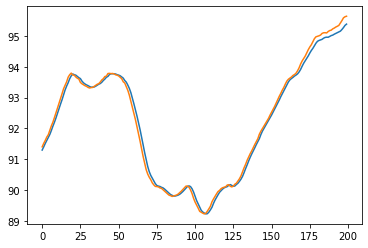

In [16]:
# just the training
plt.plot(train_results['Train_Predictions'][:200])
plt.plot(train_results['Actuals'][:200])

16/16 [==============================] - 0s 1ms/step


,Val_Predictions,Actuals
0,95.158600,95.3354
1,95.157074,95.3287
2,95.153297,95.3083
3,95.140106,95.3333
4,95.150963,95.3454
...,...,...
495,90.872192,91.0012
496,90.987251,91.1050
497,91.095604,91.2146
498,91.205803,91.3029


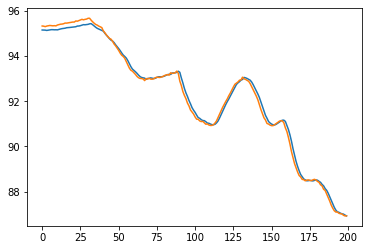

In [17]:
# how about validation
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val_Predictions':val_predictions, 'Actuals':y_val})
display(val_results)

plt.plot(val_results['Val_Predictions'][:200])
plt.plot(val_results['Actuals'][:200])

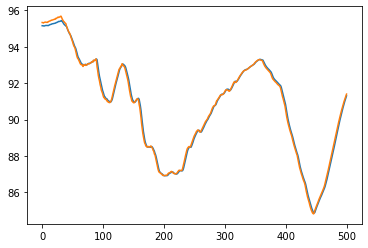

In [18]:
plt.plot(val_results['Val_Predictions'])
plt.plot(val_results['Actuals'])

### Results of single variable model

16/16 [==============================] - 0s 1ms/step


,Test_Predictions,Actuals
0,91.398308,91.4921
1,91.493553,91.5775
2,91.582642,91.6546
3,91.663750,91.7333
4,91.743294,91.7912
...,...,...
495,79.522743,79.4696
496,79.616829,80.0721
497,80.004539,80.4046
498,80.365456,80.6565


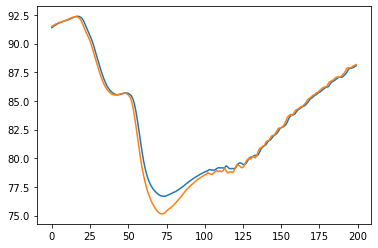

In [19]:
# how about test
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test_Predictions':test_predictions, 'Actuals':y_test})
display(test_results)

plt.plot(test_results['Test_Predictions'][:200])
plt.plot(test_results['Actuals'][:200])

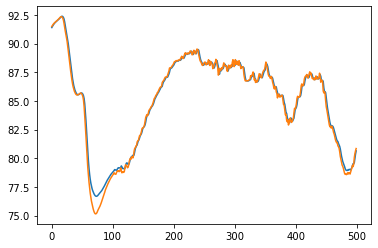

In [20]:
plt.plot(test_results['Test_Predictions'])
plt.plot(test_results['Actuals'])

#### A prettier graph for single variable results:

In [21]:
test_results['date'] = date_rng = pd.date_range(start='2017-01-23', end='2018-06-06', freq='D')
# last 500 days from the df
test_results

,Test_Predictions,Actuals,date
0,91.398308,91.4921,2017-01-23
1,91.493553,91.5775,2017-01-24
2,91.582642,91.6546,2017-01-25
3,91.663750,91.7333,2017-01-26
4,91.743294,91.7912,2017-01-27
...,...,...,...
495,79.522743,79.4696,2018-06-02
496,79.616829,80.0721,2018-06-03
497,80.004539,80.4046,2018-06-04
498,80.365456,80.6565,2018-06-05


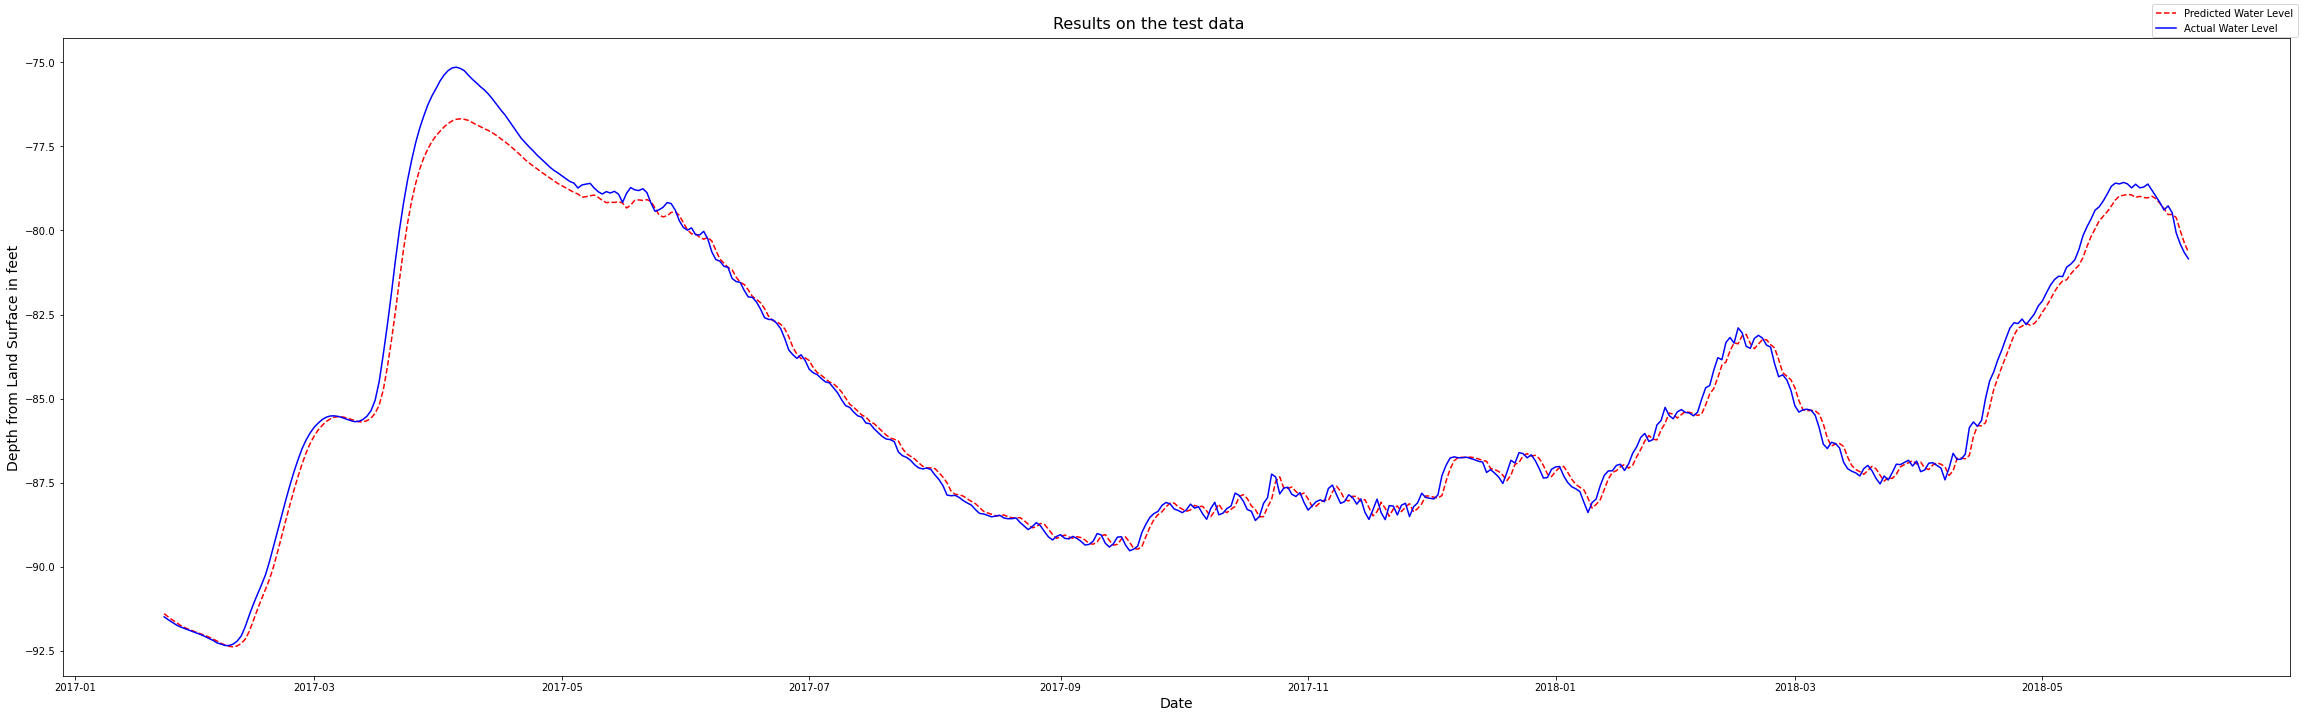

In [22]:
y = test_results.date.values
X = test_results.Test_Predictions.values*-1
X1 = test_results.Actuals.values*-1


fig, ax1 = plt.subplots(figsize=(32, 10)) #big for copy paste reasons
plt.suptitle('Results on the test data', fontsize=16)

ax1 = plt.subplot()
plt.plot(y, X, 'r--', label = 'Predicted Water Level')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Depth from Land Surface in feet', fontsize=14)

ax2 = plt.subplot()
ax2.plot(y,X1, 'b-', label = 'Actual Water Level')

fig.legend()

fig.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y):
    predictions = model.predict(X).flatten()
    df_plot = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    
    Pred = df_plot.Predictions.values*-1
    Act = df_plot.Actuals.values*-1
    
    fig, ax1 = plt.subplots(figsize=(16, 5)) 
    plt.suptitle('Prediction', fontsize=16)

    ax1 = plt.subplot()
    plt.plot(Pred, 'r--', label = 'Predicted Water Level')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Depth from Land Surface in feet', fontsize=14)

    ax2 = plt.subplot()
    ax2.plot(Act, 'b-', label = 'Actual Water Level')

    fig.legend()

    fig.tight_layout()
    plt.show()
    
    return df_plot, mse(y, predictions)

16/16 [==============================] - 0s 2ms/step


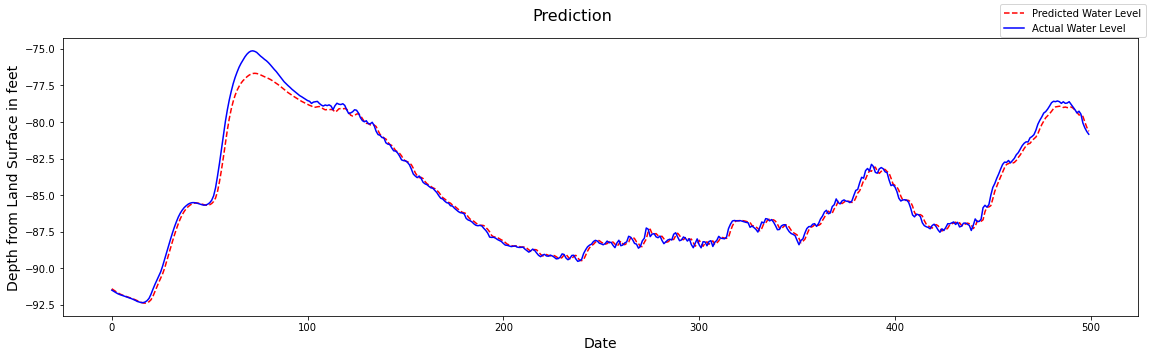

(     Predictions  Actuals
 0      91.398308  91.4921
 1      91.493553  91.5775
 2      91.582642  91.6546
 3      91.663750  91.7333
 4      91.743294  91.7912
 ..           ...      ...
 495    79.522743  79.4696
 496    79.616829  80.0721
 497    80.004539  80.4046
 498    80.365456  80.6565
 499    80.643089  80.8423
 
 [500 rows x 2 columns],
 0.17747629999340445)

In [24]:
plot_predictions1(model1, X_test, y_test)

## A convolutional NN model!

In [25]:
model2 = Sequential()
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
cp2 = ModelCheckpoint('meremodel2/', save_best_only=True)
# the above makes a folder that our gitignore should exclude

model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [27]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[cp2])

Epoch 1/50
 87/110 [======================>.......] - ETA: 0s - loss: 314.4520 - root_mean_squared_error: 17.7328INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 1s 7ms/step - loss: 250.3273 - root_mean_squared_error: 15.8217 - val_loss: 0.1020 - val_root_mean_squared_error: 0.3193
Epoch 2/50
104/110 [===========================>..] - ETA: 0s - loss: 0.1408 - root_mean_squared_error: 0.3752INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.1413 - root_mean_squared_error: 0.3760 - val_loss: 0.1012 - val_root_mean_squared_error: 0.3181
Epoch 3/50
100/110 [==========================>...] - ETA: 0s - loss: 0.1420 - root_mean_squared_error: 0.3768INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.1407 - root_mean_squared_error: 0.3751 - val_loss: 0.1010 - val_root_mean_squared_error: 0.3178
Epoch 4/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1408 - root_mean_squared_error: 0.3753 - val_loss: 0.1097 - val_root_mean_squared_error: 0.3313
Epoch 5/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1447 - root_mean_squared_error: 0.3804 - val_loss: 0.1033 - val_root_mean_squared_error: 0.3213
Epoch 6/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1415 - root_mean_squared_error: 0.3761 - val_loss: 0.1015 - val_root_mean_squared_error: 0.3185
Epoch 7/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1427 - root_mean_squared_error: 0.3778 - val_loss: 0.1128 - val_root_mean_squared_error: 0.3358
Epoch 8/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1427 - root_mean_squared_error: 0.3777 - val_loss: 0.1071 - val_root_mean_s

INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.1415 - root_mean_squared_error: 0.3762 - val_loss: 0.0996 - val_root_mean_squared_error: 0.3156
Epoch 11/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1427 - root_mean_squared_error: 0.3778 - val_loss: 0.1045 - val_root_mean_squared_error: 0.3232
Epoch 12/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1439 - root_mean_squared_error: 0.3794 - val_loss: 0.1005 - val_root_mean_squared_error: 0.3170
Epoch 13/50
103/110 [===========================>..] - ETA: 0s - loss: 0.1461 - root_mean_squared_error: 0.3822INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.1454 - root_mean_squared_error: 0.3813 - val_loss: 0.0990 - val_root_mean_squared_error: 0.3146
Epoch 14/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1424 - root_mean_squared_error: 0.3774 - val_loss: 0.1415 - val_root_mean_squared_error: 0.3762
Epoch 15/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1450 - root_mean_squared_error: 0.3808 - val_loss: 0.1042 - val_root_mean_squared_error: 0.3228
Epoch 16/50
105/110 [===========================>..] - ETA: 0s - loss: 0.1400 - root_mean_squared_error: 0.3742INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.1424 - root_mean_squared_error: 0.3773 - val_loss: 0.0982 - val_root_mean_squared_error: 0.3134
Epoch 17/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1395 - root_mean_squared_error: 0.3735 - val_loss: 0.1060 - val_root_mean_squared_error: 0.3255
Epoch 18/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1400 - root_mean_squared_error: 0.3742 - val_loss: 0.0989 - val_root_mean_squared_error: 0.3145
Epoch 19/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1404 - root_mean_squared_error: 0.3747 - val_loss: 0.1014 - val_root_mean_squared_error: 0.3184
Epoch 20/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1467 - root_mean_squared_error: 0.3830 - val_loss: 0.1247 - val_root_mean_squared_error: 0.3532
Epoch 21/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1520 - root_mean_squared_error: 0.3898 - val_loss: 0.1058 - val_root_m

INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.1489 - root_mean_squared_error: 0.3858 - val_loss: 0.0973 - val_root_mean_squared_error: 0.3119
Epoch 24/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1512 - root_mean_squared_error: 0.3888 - val_loss: 0.1046 - val_root_mean_squared_error: 0.3234
Epoch 25/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1503 - root_mean_squared_error: 0.3877 - val_loss: 0.1020 - val_root_mean_squared_error: 0.3194
Epoch 26/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1654 - root_mean_squared_error: 0.4067 - val_loss: 0.1085 - val_root_mean_squared_error: 0.3294
Epoch 27/50
103/110 [===========================>..] - ETA: 0s - loss: 0.1404 - root_mean_squared_error: 0.3747INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.1388 - root_mean_squared_error: 0.3725 - val_loss: 0.0948 - val_root_mean_squared_error: 0.3079
Epoch 28/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1385 - root_mean_squared_error: 0.3721 - val_loss: 0.0967 - val_root_mean_squared_error: 0.3110
Epoch 29/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1491 - root_mean_squared_error: 0.3861 - val_loss: 0.1122 - val_root_mean_squared_error: 0.3350
Epoch 30/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1445 - root_mean_squared_error: 0.3802 - val_loss: 0.1302 - val_root_mean_squared_error: 0.3608
Epoch 31/50
101/110 [==========================>...] - ETA: 0s - loss: 0.1420 - root_mean_squared_error: 0.3768INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.1419 - root_mean_squared_error: 0.3767 - val_loss: 0.0938 - val_root_mean_squared_error: 0.3063
Epoch 32/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1398 - root_mean_squared_error: 0.3739 - val_loss: 0.1726 - val_root_mean_squared_error: 0.4154
Epoch 33/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1397 - root_mean_squared_error: 0.3738 - val_loss: 0.2010 - val_root_mean_squared_error: 0.4484
Epoch 34/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1433 - root_mean_squared_error: 0.3786 - val_loss: 0.1123 - val_root_mean_squared_error: 0.3351
Epoch 35/50
104/110 [===========================>..] - ETA: 0s - loss: 0.1671 - root_mean_squared_error: 0.4088INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.1636 - root_mean_squared_error: 0.4045 - val_loss: 0.0892 - val_root_mean_squared_error: 0.2987
Epoch 36/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1506 - root_mean_squared_error: 0.3881 - val_loss: 0.1274 - val_root_mean_squared_error: 0.3570
Epoch 37/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1415 - root_mean_squared_error: 0.3761 - val_loss: 0.0897 - val_root_mean_squared_error: 0.2995
Epoch 38/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1453 - root_mean_squared_error: 0.3812 - val_loss: 0.1600 - val_root_mean_squared_error: 0.4000
Epoch 39/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1445 - root_mean_squared_error: 0.3801 - val_loss: 0.0932 - val_root_mean_squared_error: 0.3052
Epoch 40/50
107/110 [============================>.] - ETA: 0s - loss: 0.1718 - root_mean_squared_error: 0.4145INFO:tensorflow:Assets written to: m

INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.1725 - root_mean_squared_error: 0.4153 - val_loss: 0.0854 - val_root_mean_squared_error: 0.2922
Epoch 41/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1567 - root_mean_squared_error: 0.3958 - val_loss: 0.0924 - val_root_mean_squared_error: 0.3040
Epoch 42/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1730 - root_mean_squared_error: 0.4159 - val_loss: 0.2374 - val_root_mean_squared_error: 0.4873
Epoch 43/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1651 - root_mean_squared_error: 0.4063 - val_loss: 0.0856 - val_root_mean_squared_error: 0.2926
Epoch 44/50
103/110 [===========================>..] - ETA: 0s - loss: 0.1404 - root_mean_squared_error: 0.3746INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.1396 - root_mean_squared_error: 0.3736 - val_loss: 0.0839 - val_root_mean_squared_error: 0.2896
Epoch 45/50
106/110 [===========================>..] - ETA: 0s - loss: 0.1683 - root_mean_squared_error: 0.4102INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.1676 - root_mean_squared_error: 0.4094 - val_loss: 0.0804 - val_root_mean_squared_error: 0.2835
Epoch 46/50
103/110 [===========================>..] - ETA: 0s - loss: 0.1558 - root_mean_squared_error: 0.3947INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.1531 - root_mean_squared_error: 0.3913 - val_loss: 0.0795 - val_root_mean_squared_error: 0.2819
Epoch 47/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1718 - root_mean_squared_error: 0.4145 - val_loss: 0.6169 - val_root_mean_squared_error: 0.7854
Epoch 48/50
110/110 [==============================] - 0s 1ms/step - loss: 0.2195 - root_mean_squared_error: 0.4685 - val_loss: 0.1287 - val_root_mean_squared_error: 0.3587
Epoch 49/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1498 - root_mean_squared_error: 0.3870 - val_loss: 0.1381 - val_root_mean_squared_error: 0.3716
Epoch 50/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1862 - root_mean_squared_error: 0.4315 - val_loss: 0.1045 - val_root_mean_squared_error: 0.3233


16/16 [==============================] - 0s 804us/step


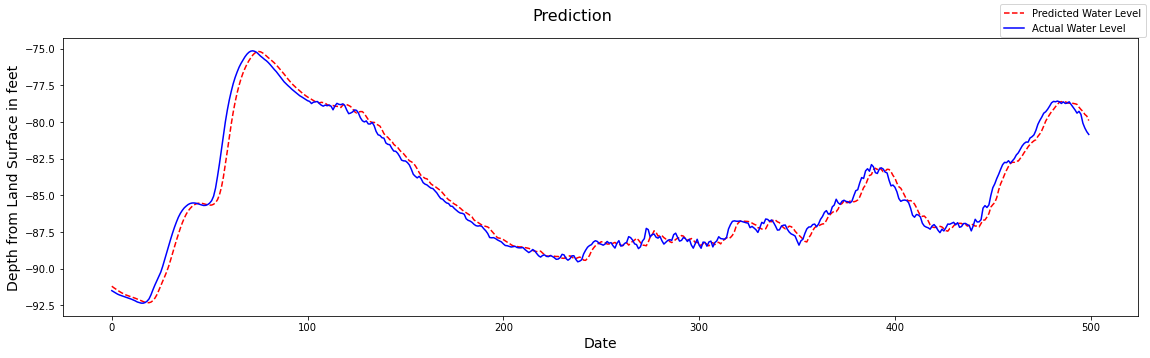

(     Predictions  Actuals
 0      91.189232  91.4921
 1      91.290611  91.5775
 2      91.380486  91.6546
 3      91.471748  91.7333
 4      91.558861  91.7912
 ..           ...      ...
 495    79.139870  79.4696
 496    79.276192  80.0721
 497    79.475487  80.4046
 498    79.591179  80.6565
 499    79.896324  80.8423
 
 [500 rows x 2 columns],
 0.3300333144764854)

In [28]:
model2 = load_model('meremodel2/')
plot_predictions1(model2, X_test, y_test)

## GRU Model

In [29]:
model3 = Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Flatten())
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
cp3 = ModelCheckpoint('meremodel3/', save_best_only=True)
# the above makes a folder that our gitignore should exclude

model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [31]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[cp3])

Epoch 1/50
101/110 [==========================>...] - ETA: 0s - loss: 7412.2588 - root_mean_squared_error: 86.0945INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 4s 20ms/step - loss: 7348.0581 - root_mean_squared_error: 85.7208 - val_loss: 6520.8770 - val_root_mean_squared_error: 80.7519
Epoch 2/50
 90/110 [=======================>......] - ETA: 0s - loss: 5288.9404 - root_mean_squared_error: 72.7251INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 5043.8823 - root_mean_squared_error: 71.0203 - val_loss: 3659.8191 - val_root_mean_squared_error: 60.4964
Epoch 3/50
 90/110 [=======================>......] - ETA: 0s - loss: 2698.0020 - root_mean_squared_error: 51.9423INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 19ms/step - loss: 2475.9434 - root_mean_squared_error: 49.7589 - val_loss: 1177.7487 - val_root_mean_squared_error: 34.3183
Epoch 4/50
 88/110 [=======================>......] - ETA: 0s - loss: 517.0205 - root_mean_squared_error: 22.7381INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 436.3948 - root_mean_squared_error: 20.8901 - val_loss: 68.7280 - val_root_mean_squared_error: 8.2902
Epoch 5/50
110/110 [==============================] - ETA: 0s - loss: 25.1451 - root_mean_squared_error: 5.0145INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 25.1451 - root_mean_squared_error: 5.0145 - val_loss: 8.8114 - val_root_mean_squared_error: 2.9684
Epoch 6/50
 94/110 [========================>.....] - ETA: 0s - loss: 12.4419 - root_mean_squared_error: 3.5273INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 12.1644 - root_mean_squared_error: 3.4877 - val_loss: 7.8281 - val_root_mean_squared_error: 2.7979
Epoch 7/50
107/110 [============================>.] - ETA: 0s - loss: 11.4681 - root_mean_squared_error: 3.3865INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 19ms/step - loss: 11.5025 - root_mean_squared_error: 3.3915 - val_loss: 7.1125 - val_root_mean_squared_error: 2.6669
Epoch 8/50
 90/110 [=======================>......] - ETA: 0s - loss: 9.8409 - root_mean_squared_error: 3.1370 INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 9.4801 - root_mean_squared_error: 3.0790 - val_loss: 5.2365 - val_root_mean_squared_error: 2.2883
Epoch 9/50
 90/110 [=======================>......] - ETA: 0s - loss: 4.6283 - root_mean_squared_error: 2.1513INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 4.1155 - root_mean_squared_error: 2.0287 - val_loss: 1.2294 - val_root_mean_squared_error: 1.1088
Epoch 10/50
 89/110 [=======================>......] - ETA: 0s - loss: 1.0003 - root_mean_squared_error: 1.0002INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.9333 - root_mean_squared_error: 0.9661 - val_loss: 0.4438 - val_root_mean_squared_error: 0.6662
Epoch 11/50
109/110 [============================>.] - ETA: 0s - loss: 0.3968 - root_mean_squared_error: 0.6300INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.3961 - root_mean_squared_error: 0.6294 - val_loss: 0.3294 - val_root_mean_squared_error: 0.5740
Epoch 12/50
106/110 [===========================>..] - ETA: 0s - loss: 0.2533 - root_mean_squared_error: 0.5033INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.2518 - root_mean_squared_error: 0.5018 - val_loss: 0.2090 - val_root_mean_squared_error: 0.4571
Epoch 13/50
 89/110 [=======================>......] - ETA: 0s - loss: 0.1658 - root_mean_squared_error: 0.4072INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.1596 - root_mean_squared_error: 0.3996 - val_loss: 0.1174 - val_root_mean_squared_error: 0.3426
Epoch 14/50
 91/110 [=======================>......] - ETA: 0s - loss: 0.1381 - root_mean_squared_error: 0.3716INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.1368 - root_mean_squared_error: 0.3699 - val_loss: 0.1116 - val_root_mean_squared_error: 0.3341
Epoch 15/50
102/110 [==========================>...] - ETA: 0s - loss: 0.1269 - root_mean_squared_error: 0.3563INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.1256 - root_mean_squared_error: 0.3544 - val_loss: 0.0984 - val_root_mean_squared_error: 0.3137
Epoch 16/50
100/110 [==========================>...] - ETA: 0s - loss: 0.0984 - root_mean_squared_error: 0.3136INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0969 - root_mean_squared_error: 0.3113 - val_loss: 0.0773 - val_root_mean_squared_error: 0.2780
Epoch 17/50
109/110 [============================>.] - ETA: 0s - loss: 0.1139 - root_mean_squared_error: 0.3376INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.1136 - root_mean_squared_error: 0.3371 - val_loss: 0.0758 - val_root_mean_squared_error: 0.2753
Epoch 18/50
 92/110 [========================>.....] - ETA: 0s - loss: 0.0818 - root_mean_squared_error: 0.2861INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0825 - root_mean_squared_error: 0.2872 - val_loss: 0.0571 - val_root_mean_squared_error: 0.2390
Epoch 19/50
110/110 [==============================] - 0s 3ms/step - loss: 0.1042 - root_mean_squared_error: 0.3228 - val_loss: 0.0931 - val_root_mean_squared_error: 0.3051
Epoch 20/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0867 - root_mean_squared_error: 0.2944 - val_loss: 0.0889 - val_root_mean_squared_error: 0.2981
Epoch 21/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0835 - root_mean_squared_error: 0.2889 - val_loss: 0.1463 - val_root_mean_squared_error: 0.3825
Epoch 22/50
 92/110 [========================>.....] - ETA: 0s - loss: 0.0845 - root_mean_squared_error: 0.2906INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0821 - root_mean_squared_error: 0.2865 - val_loss: 0.0461 - val_root_mean_squared_error: 0.2148
Epoch 23/50
 90/110 [=======================>......] - ETA: 0s - loss: 0.0771 - root_mean_squared_error: 0.2777INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.0817 - root_mean_squared_error: 0.2858 - val_loss: 0.0413 - val_root_mean_squared_error: 0.2032
Epoch 24/50
 89/110 [=======================>......] - ETA: 0s - loss: 0.0709 - root_mean_squared_error: 0.2662INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0709 - root_mean_squared_error: 0.2663 - val_loss: 0.0401 - val_root_mean_squared_error: 0.2003
Epoch 25/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0808 - root_mean_squared_error: 0.2843 - val_loss: 0.0802 - val_root_mean_squared_error: 0.2832
Epoch 26/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0821 - root_mean_squared_error: 0.2865 - val_loss: 0.2985 - val_root_mean_squared_error: 0.5463
Epoch 27/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0906 - root_mean_squared_error: 0.3010 - val_loss: 0.0715 - val_root_mean_squared_error: 0.2673
Epoch 28/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0597 - root_mean_squared_error: 0.2443 - val_loss: 0.0796 - val_root_mean_squared_error: 0.2821
Epoch 29/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0625 - root_mean_squared_error: 0.2501 - val_loss: 0.0760 - val_root_

INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0637 - root_mean_squared_error: 0.2524 - val_loss: 0.0360 - val_root_mean_squared_error: 0.1896
Epoch 32/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0663 - root_mean_squared_error: 0.2575 - val_loss: 0.1088 - val_root_mean_squared_error: 0.3298
Epoch 33/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0771 - root_mean_squared_error: 0.2776 - val_loss: 0.0403 - val_root_mean_squared_error: 0.2007
Epoch 34/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0704 - root_mean_squared_error: 0.2654 - val_loss: 0.1008 - val_root_mean_squared_error: 0.3175
Epoch 35/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0900 - root_mean_squared_error: 0.2999 - val_loss: 0.0482 - val_root_mean_squared_error: 0.2195
Epoch 36/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0647 - root_mean_squared_error: 0.2544 - val_loss: 0.0449 - val_root_

INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0609 - root_mean_squared_error: 0.2467 - val_loss: 0.0353 - val_root_mean_squared_error: 0.1879
Epoch 41/50
101/110 [==========================>...] - ETA: 0s - loss: 0.0562 - root_mean_squared_error: 0.2370INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.0551 - root_mean_squared_error: 0.2348 - val_loss: 0.0318 - val_root_mean_squared_error: 0.1784
Epoch 42/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0562 - root_mean_squared_error: 0.2371 - val_loss: 0.0364 - val_root_mean_squared_error: 0.1909
Epoch 43/50
110/110 [==============================] - ETA: 0s - loss: 0.0754 - root_mean_squared_error: 0.2746INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0754 - root_mean_squared_error: 0.2746 - val_loss: 0.0291 - val_root_mean_squared_error: 0.1705
Epoch 44/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0426 - root_mean_squared_error: 0.2063 - val_loss: 0.0922 - val_root_mean_squared_error: 0.3036
Epoch 45/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0506 - root_mean_squared_error: 0.2249 - val_loss: 0.0366 - val_root_mean_squared_error: 0.1914
Epoch 46/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0578 - root_mean_squared_error: 0.2404 - val_loss: 0.1089 - val_root_mean_squared_error: 0.3301
Epoch 47/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0307 - root_mean_squared_error: 0.1754 - val_loss: 0.0470 - val_root_mean_squared_error: 0.2168
Epoch 48/50
109/110 [============================>.] - ETA: 0s - loss: 0.0330 - root_mean_squared_error: 0.1817INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0330 - root_mean_squared_error: 0.1816 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1430
Epoch 49/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0324 - root_mean_squared_error: 0.1799 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1677
Epoch 50/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0283 - root_mean_squared_error: 0.1683 - val_loss: 0.0417 - val_root_mean_squared_error: 0.2043


16/16 [==============================] - 0s 1ms/step


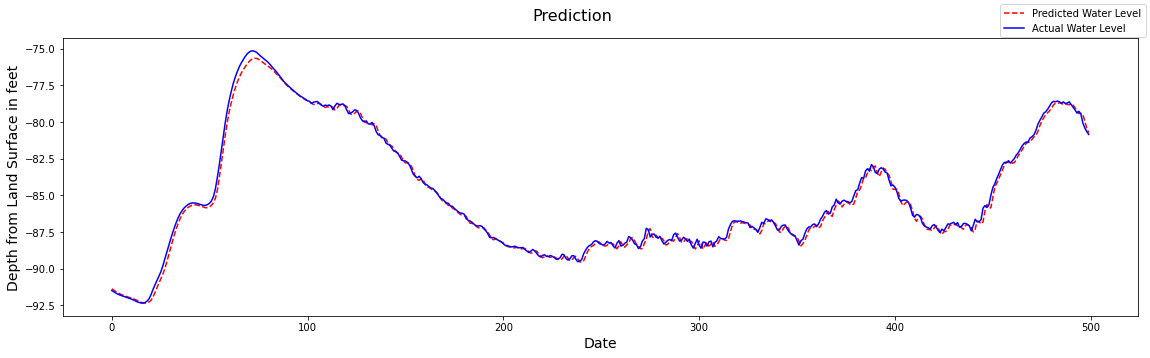

(     Predictions  Actuals
 0      91.373245  91.4921
 1      91.464539  91.5775
 2      91.552048  91.6546
 3      91.632172  91.7333
 4      91.708664  91.7912
 ..           ...      ...
 495    79.400185  79.4696
 496    79.485825  80.0721
 497    79.966614  80.4046
 498    80.436668  80.6565
 499    80.721924  80.8423
 
 [500 rows x 2 columns],
 0.08115143096094052)

In [32]:
model3 = load_model('meremodel3/')
plot_predictions1(model3, X_test, y_test)

## Multivariate tutorial

both of these tutorials skip basically all explanation; I need to go through Marcos' notebooks and whatnot, but below is following the second one listed above. [This one](https://www.youtube.com/watch?v=kGdbPnMCdOg) starting around 17 minutes in (the first 17 minutes are doing the CNN and GRU above)

In [33]:
# recall the average well measurements are stored in well
well

date
2006-02-07    91.0100
2006-02-08    91.0429
2006-02-09    91.1096
2006-02-10    91.1954
2006-02-11    91.3012
               ...   
2018-06-02    79.4696
2018-06-03    80.0721
2018-06-04    80.4046
2018-06-05    80.6565
2018-06-06    80.8423
Name: avg_well_depth, Length: 4503, dtype: float64

In [34]:
well_df = pd.DataFrame({'avg_well_depth':well})
well_df['Seconds'] = well_df.index.map(pd.Timestamp.timestamp)
well_df

,avg_well_depth,Seconds
date,,
2006-02-07,91.0100,1.139270e+09
2006-02-08,91.0429,1.139357e+09
2006-02-09,91.1096,1.139443e+09
2006-02-10,91.1954,1.139530e+09
2006-02-11,91.3012,1.139616e+09
...,...,...
2018-06-02,79.4696,1.527898e+09
2018-06-03,80.0721,1.527984e+09
2018-06-04,80.4046,1.528070e+09


In [35]:
day = 60*60*24
year = 365.2425*day

well_df['Year sin'] = np.sin(well_df['Seconds'] * (2 * np.pi / year))
well_df['Year cos'] = np.cos(well_df['Seconds'] * (2 * np.pi / year))

well_df = well_df.drop('Seconds', axis=1)
well_df.head()

,avg_well_depth,Year sin,Year cos
date,,,
2006-02-07,91.0100,0.598115,0.801410
2006-02-08,91.0429,0.611813,0.791003
2006-02-09,91.1096,0.625329,0.780361
2006-02-10,91.1954,0.638660,0.769489
2006-02-11,91.3012,0.651802,0.758389


In [36]:
well_df['gage_ht'] = df.gage_ht.values
well_df['prcp'] = df.prcp.values
well_df.head()

,avg_well_depth,Year sin,Year cos,gage_ht,prcp
date,,,,,
2006-02-07,91.0100,0.598115,0.801410,21.65,0.0
2006-02-08,91.0429,0.611813,0.791003,21.64,0.0
2006-02-09,91.1096,0.625329,0.780361,21.58,0.0
2006-02-10,91.1954,0.638660,0.769489,21.46,0.0
2006-02-11,91.3012,0.651802,0.758389,21.36,0.0


In [37]:
def df_to_X_y_multi(df, window_size=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [a for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [38]:
X2, y2 = df_to_X_y_multi(well_df)
X2.shape, y2.shape

((4497, 6, 5), (4497,))

### Train Test Split

In [40]:
X2_train, y2_train = X2[:3497], y2[:3497]
X2_val, y2_val = X2[3497:3997], y2[3497:3997]
X2_test, y2_test = X2[3997:], y2[3997:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((3497, 6, 5), (3497,), (500, 6, 5), (500,), (500, 6, 5), (500,))

### Scaling
35 minutes in

In [41]:
well_training_mean = np.mean(X2_train[:, :, 0])
well_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - well_training_mean) / well_training_std
    return X

In [42]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.54167390e-01,  2.81741935e-01,  9.59490220e-01,
          1.88700000e+01,  2.40000000e-01],
        [ 1.85938003e-01,  2.98205330e-01,  9.54501745e-01,
          1.88900000e+01,  4.10000000e-01],
        [ 2.15809287e-01,  3.14580477e-01,  9.49230806e-01,
          1.88600000e+01,  0.00000000e+00],
        [ 2.47349679e-01,  3.30862531e-01,  9.43678963e-01,
          1.88700000e+01,  0.00000000e+00],
        [ 2.72760415e-01,  3.47046673e-01,  9.37847859e-01,
          1.88900000e+01,  3.00000000e-02],
        [ 3.00358258e-01,  3.63128115e-01,  9.31739219e-01,
          1.88900000e+01,  2.00000000e-01]],

       [[ 1.85938003e-01,  2.98205330e-01,  9.54501745e-01,
          1.88900000e+01,  4.10000000e-01],
        [ 2.15809287e-01,  3.14580477e-01,  9.49230806e-01,
          1.88600000e+01,  0.00000000e+00],
        [ 2.47349679e-01,  3.30862531e-01,  9.43678963e-01,
          1.88700000e+01,  0.00000000e+00],
        [ 2.72760415e-01,  3.47046673e-01,  9.37847859e-01,
  

In [43]:
model4 = Sequential()
model4.add(InputLayer((6,5)))
model4.add(LSTM(64))
model4.add(Flatten())
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
cp4 = ModelCheckpoint('meremodel4/', save_best_only=True)
# the above makes a folder that our gitignore should exclude

model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [45]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=50, callbacks=[cp4])

Epoch 1/50
100/110 [==========================>...] - ETA: 0s - loss: 6131.1108 - root_mean_squared_error: 78.3014INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 4s 22ms/step - loss: 5954.5771 - root_mean_squared_error: 77.1659 - val_loss: 3870.2356 - val_root_mean_squared_error: 62.2112
Epoch 2/50
103/110 [===========================>..] - ETA: 0s - loss: 2136.8411 - root_mean_squared_error: 46.2260INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 19ms/step - loss: 2061.2327 - root_mean_squared_error: 45.4008 - val_loss: 770.8624 - val_root_mean_squared_error: 27.7644
Epoch 3/50
103/110 [===========================>..] - ETA: 0s - loss: 301.9644 - root_mean_squared_error: 17.3771INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 21ms/step - loss: 287.9840 - root_mean_squared_error: 16.9701 - val_loss: 52.7104 - val_root_mean_squared_error: 7.2602
Epoch 4/50
 98/110 [=========================>....] - ETA: 0s - loss: 23.5135 - root_mean_squared_error: 4.8491INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 19ms/step - loss: 22.2797 - root_mean_squared_error: 4.7201 - val_loss: 8.8513 - val_root_mean_squared_error: 2.9751
Epoch 5/50
103/110 [===========================>..] - ETA: 0s - loss: 12.1403 - root_mean_squared_error: 3.4843INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 12.1891 - root_mean_squared_error: 3.4913 - val_loss: 7.8553 - val_root_mean_squared_error: 2.8027
Epoch 6/50
 92/110 [========================>.....] - ETA: 0s - loss: 12.4861 - root_mean_squared_error: 3.5336INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 21ms/step - loss: 12.1046 - root_mean_squared_error: 3.4792 - val_loss: 7.8552 - val_root_mean_squared_error: 2.8027
Epoch 7/50
110/110 [==============================] - 0s 3ms/step - loss: 12.1066 - root_mean_squared_error: 3.4795 - val_loss: 7.8572 - val_root_mean_squared_error: 2.8031
Epoch 8/50
 91/110 [=======================>......] - ETA: 0s - loss: 12.3057 - root_mean_squared_error: 3.5079INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 12.1025 - root_mean_squared_error: 3.4789 - val_loss: 7.8048 - val_root_mean_squared_error: 2.7937
Epoch 9/50
110/110 [==============================] - 0s 2ms/step - loss: 12.0905 - root_mean_squared_error: 3.4771 - val_loss: 7.8566 - val_root_mean_squared_error: 2.8030
Epoch 10/50
110/110 [==============================] - 0s 2ms/step - loss: 12.0842 - root_mean_squared_error: 3.4762 - val_loss: 7.8491 - val_root_mean_squared_error: 2.8016
Epoch 11/50
 93/110 [========================>.....] - ETA: 0s - loss: 11.8720 - root_mean_squared_error: 3.4456INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 11.5801 - root_mean_squared_error: 3.4030 - val_loss: 6.0860 - val_root_mean_squared_error: 2.4670
Epoch 12/50
 92/110 [========================>.....] - ETA: 0s - loss: 6.2668 - root_mean_squared_error: 2.5034INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 6.2400 - root_mean_squared_error: 2.4980 - val_loss: 2.6657 - val_root_mean_squared_error: 1.6327
Epoch 13/50
105/110 [===========================>..] - ETA: 0s - loss: 5.4426 - root_mean_squared_error: 2.3329INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 21ms/step - loss: 5.3710 - root_mean_squared_error: 2.3175 - val_loss: 1.9337 - val_root_mean_squared_error: 1.3906
Epoch 14/50
 89/110 [=======================>......] - ETA: 0s - loss: 3.3185 - root_mean_squared_error: 1.8217INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 2.9306 - root_mean_squared_error: 1.7119 - val_loss: 0.9983 - val_root_mean_squared_error: 0.9991
Epoch 15/50
 89/110 [=======================>......] - ETA: 0s - loss: 0.9089 - root_mean_squared_error: 0.9534INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.8453 - root_mean_squared_error: 0.9194 - val_loss: 0.4632 - val_root_mean_squared_error: 0.6806
Epoch 16/50
 92/110 [========================>.....] - ETA: 0s - loss: 0.2869 - root_mean_squared_error: 0.5357INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.2683 - root_mean_squared_error: 0.5179 - val_loss: 0.1603 - val_root_mean_squared_error: 0.4003
Epoch 17/50
 91/110 [=======================>......] - ETA: 0s - loss: 0.1359 - root_mean_squared_error: 0.3687INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.1329 - root_mean_squared_error: 0.3645 - val_loss: 0.0910 - val_root_mean_squared_error: 0.3017
Epoch 18/50
 89/110 [=======================>......] - ETA: 0s - loss: 0.0897 - root_mean_squared_error: 0.2995INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.0880 - root_mean_squared_error: 0.2966 - val_loss: 0.0576 - val_root_mean_squared_error: 0.2401
Epoch 19/50
 98/110 [=========================>....] - ETA: 0s - loss: 0.0684 - root_mean_squared_error: 0.2615INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.0685 - root_mean_squared_error: 0.2617 - val_loss: 0.0433 - val_root_mean_squared_error: 0.2080
Epoch 20/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0596 - root_mean_squared_error: 0.2441 - val_loss: 0.0439 - val_root_mean_squared_error: 0.2094
Epoch 21/50
 97/110 [=========================>....] - ETA: 0s - loss: 0.0536 - root_mean_squared_error: 0.2314INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 22ms/step - loss: 0.0521 - root_mean_squared_error: 0.2283 - val_loss: 0.0291 - val_root_mean_squared_error: 0.1706
Epoch 22/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0427 - root_mean_squared_error: 0.2067 - val_loss: 0.0293 - val_root_mean_squared_error: 0.1712
Epoch 23/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0400 - root_mean_squared_error: 0.2000 - val_loss: 0.0313 - val_root_mean_squared_error: 0.1768
Epoch 24/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0345 - root_mean_squared_error: 0.1857 - val_loss: 0.0306 - val_root_mean_squared_error: 0.1750
Epoch 25/50
105/110 [===========================>..] - ETA: 0s - loss: 0.0313 - root_mean_squared_error: 0.1770INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.0313 - root_mean_squared_error: 0.1771 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1458
Epoch 26/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0308 - root_mean_squared_error: 0.1755 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1524
Epoch 27/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0241 - root_mean_squared_error: 0.1552 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1484
Epoch 28/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0244 - root_mean_squared_error: 0.1561 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1510
Epoch 29/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0259 - root_mean_squared_error: 0.1608 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1892
Epoch 30/50
103/110 [===========================>..] - ETA: 0s - loss: 0.0245 - root_mean_squared_error: 0.1565INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.0246 - root_mean_squared_error: 0.1567 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1446
Epoch 31/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0205 - root_mean_squared_error: 0.1432 - val_loss: 0.0382 - val_root_mean_squared_error: 0.1954
Epoch 32/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0197 - root_mean_squared_error: 0.1403 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1720
Epoch 33/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0181 - root_mean_squared_error: 0.1345 - val_loss: 0.0249 - val_root_mean_squared_error: 0.1579
Epoch 34/50
104/110 [===========================>..] - ETA: 0s - loss: 0.0170 - root_mean_squared_error: 0.1303INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 21ms/step - loss: 0.0172 - root_mean_squared_error: 0.1313 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1313
Epoch 35/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0178 - root_mean_squared_error: 0.1334 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1523
Epoch 36/50
 97/110 [=========================>....] - ETA: 0s - loss: 0.0157 - root_mean_squared_error: 0.1253INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.0159 - root_mean_squared_error: 0.1262 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1202
Epoch 37/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0172 - root_mean_squared_error: 0.1312 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1233
Epoch 38/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0148 - root_mean_squared_error: 0.1215 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1317
Epoch 39/50
110/110 [==============================] - 0s 4ms/step - loss: 0.0147 - root_mean_squared_error: 0.1214 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1410
Epoch 40/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0149 - root_mean_squared_error: 0.1220 - val_loss: 0.0175 - val_root_mean_squared_error: 0.1325
Epoch 41/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0147 - root_mean_squared_error: 0.1214 - val_loss: 0.0145 - val_root_

INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.0125 - root_mean_squared_error: 0.1119 - val_loss: 0.0139 - val_root_mean_squared_error: 0.1177
Epoch 45/50
107/110 [============================>.] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.1186INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.0141 - root_mean_squared_error: 0.1188 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1118
Epoch 46/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0120 - root_mean_squared_error: 0.1093 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1224
Epoch 47/50
104/110 [===========================>..] - ETA: 0s - loss: 0.0121 - root_mean_squared_error: 0.1099INFO:tensorflow:Assets written to: meremodel4/assets


INFO:tensorflow:Assets written to: meremodel4/assets


110/110 [==============================] - 2s 22ms/step - loss: 0.0122 - root_mean_squared_error: 0.1104 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1046
Epoch 48/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0113 - root_mean_squared_error: 0.1061 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1138
Epoch 49/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0108 - root_mean_squared_error: 0.1039 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106
Epoch 50/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0104 - root_mean_squared_error: 0.1022 - val_loss: 0.0179 - val_root_mean_squared_error: 0.1340


16/16 [==============================] - 0s 1ms/step


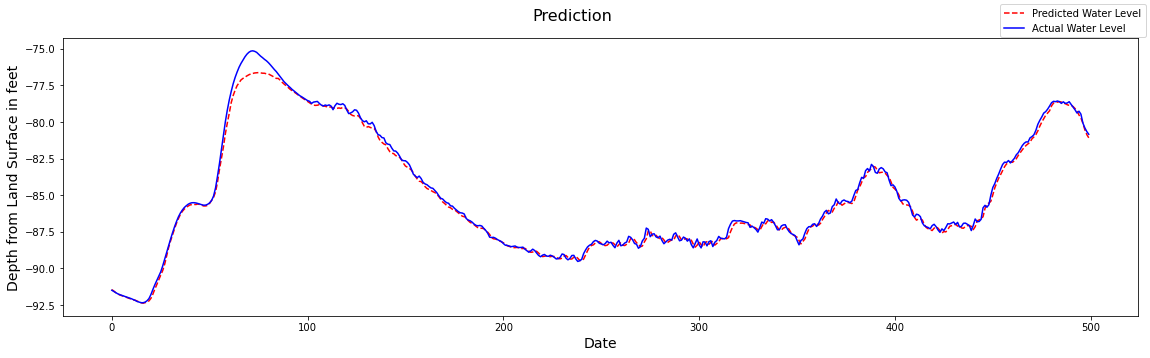

(     Predictions  Actuals
 0      91.452705  91.4921
 1      91.544189  91.5775
 2      91.653587  91.6546
 3      91.738457  91.7333
 4      91.809319  91.7912
 ..           ...      ...
 495    79.729515  79.4696
 496    80.085945  80.0721
 497    80.534645  80.4046
 498    80.860817  80.6565
 499    81.084755  80.8423
 
 [500 rows x 2 columns],
 0.10738686922877837)

In [46]:
model4 = load_model('meremodel4/')
plot_predictions1(model4, X2_test, y2_test)

so in this simple multivariable model, I'm gettting test error for the last 500 days as 